In [1]:
import pandas as pd
dataset = pd.read_csv("insurance_pre.csv")
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [3]:
dataset= pd.get_dummies(dataset,drop_first=True,dtype=int)
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
features=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
target=dataset[['charges']]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=0)


In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', splitter='random')

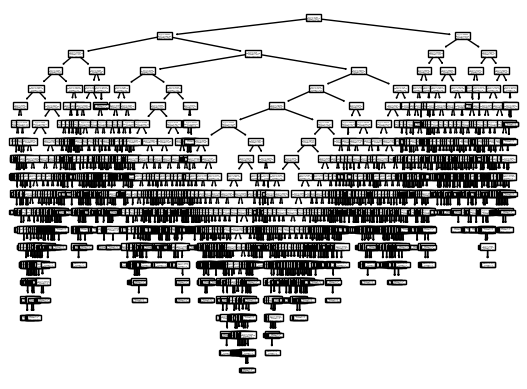

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [41]:
y_pred=regressor.predict(x_test)
y_pred

array([ 9377.9047 ,  8930.93455, 44202.6536 , 13143.86485,  9264.797  ,
       21984.47061,  2196.4732 , 10560.4917 ,  7151.092  ,  5031.26955,
        6184.2994 , 10118.424  ,  7050.642  ,  4571.41305, 18246.4955 ,
       10600.5483 , 12629.8967 ,  3292.52985,  6455.86265, 34166.273  ,
       24869.8368 , 12269.68865,  9625.92   , 21774.32215,  1391.5287 ,
        4462.7218 ,  3161.454  ,  8538.28845,  3757.8448 ,  8027.968  ,
        8252.2843 , 48673.5588 , 12981.3457 , 10226.2842 , 15359.1045 ,
        3554.203  ,  8733.22925, 44585.45587, 37701.8768 ,  1880.07   ,
        5266.3656 ,  3062.50825, 37829.7242 , 44202.6536 , 34828.654  ,
        3579.8287 , 10600.5483 ,  6849.026  ,  4719.52405, 12032.326  ,
        2473.3341 ,  4687.797  , 21978.6769 , 60021.39897, 11856.4115 ,
        2689.4954 ,  2897.3235 ,  8442.667  ,  9788.8659 , 12913.9924 ,
        1256.299  , 46130.5265 , 27941.28758, 25333.33284, 11033.6617 ,
        9877.6077 , 17352.6803 , 37607.5277 ,  3077.0955 ,  7512

In [42]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7794732565180241